Code to **predict** if an **Employee** will be eligible for a **promotion or not?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset:

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [4]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [5]:
# Lets print the first 5 rows in the dataframe of training dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [6]:
# Lets print the first 5 rows in the dataframe of test dataset
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


Getting the **datatype** of each column of the dataframe and **df dimensions**:

In [7]:
datatypeseries = train.dtypes
print('Datatype of each column in the dataframe is as follows:')
print(datatypeseries)
print('\n')
print(f'Shape of the training data frame is {train.shape}')

Datatype of each column in the dataframe is as follows:
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


Shape of the training data frame is (54808, 13)


Finding the number of **unique values** and **Nah values** in each column:

In [8]:
for col_name in train.columns.values:
    uniq_len = len(pd.unique(train[col_name]))
    null_len = train[col_name].isnull().sum()
    print(f"The {col_name} has {uniq_len} unique values and {null_len} null values")

The employee_id has 54808 unique values and 0 null values
The department has 9 unique values and 0 null values
The region has 34 unique values and 0 null values
The education has 4 unique values and 2409 null values
The gender has 2 unique values and 0 null values
The recruitment_channel has 3 unique values and 0 null values
The no_of_trainings has 10 unique values and 0 null values
The age has 41 unique values and 0 null values
The previous_year_rating has 6 unique values and 4124 null values
The length_of_service has 35 unique values and 0 null values
The awards_won? has 2 unique values and 0 null values
The avg_training_score has 61 unique values and 0 null values
The is_promoted has 2 unique values and 0 null values


Most of the features donot have any null values, but a only **few unique values exist out of 54808 data**. So, **proper cleaning and visualization** should be odne to get more info regarding the dataset.

In [9]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Variables', 'Number of missing values']
missing_df['Filling factor (%)'] = (train.shape[0] - missing_df['Number of missing values']) * 100 / (train.shape[0])
missing_df.sort_values('Filling factor (%)').reset_index(drop=True)

,Variables,Number of missing values,Filling factor (%)
0,previous_year_rating,4124,92.475551
1,education,2409,95.604656
2,employee_id,0,100.000000
3,department,0,100.000000
4,region,0,100.000000
5,gender,0,100.000000
6,recruitment_channel,0,100.000000
7,no_of_trainings,0,100.000000
8,age,0,100.000000
9,length_of_service,0,100.000000


More than **5%** and **8%** values are missing in **education** and **previous_year_rating** columns. Since these values are not continous data and are dependent on the person they cannot be imputated on the basis of other people's ratings. So, **removing the data** is a better alternative.

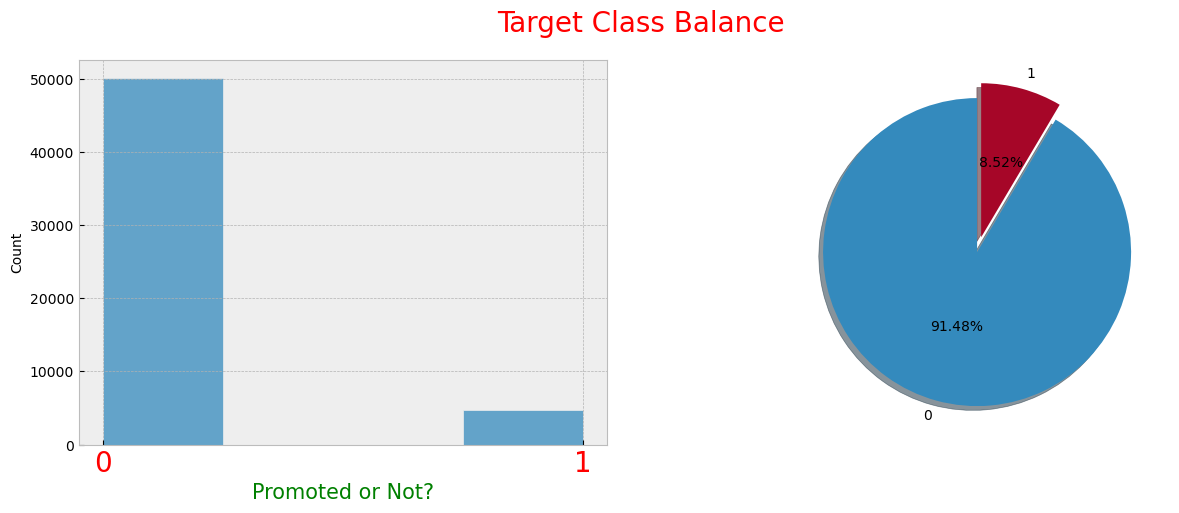

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('bmh')

plt.subplot(1, 2, 1)
ax = sns.histplot(data=train['is_promoted'], binwidth=0.25)
ax.set_xticks([0,1])
ax.set_xticklabels(['0', '1'], color='r', fontsize=20)

plt.xlabel('Promoted or Not?', fontsize = 15, color='g')

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                        labels = ['0', '1'], shadow = True, pctdistance = 0.5)
plt.axis('off')
plt.suptitle('Target Class Balance', fontsize = 20, color='r')
plt.show()

The data is an imbalanced dataset with only **less than 10% of the people** actually getting promotions. Since, this is an imbalanced dataset, so extra care should be taken.

Since, there are so many missing values in the dataset, it would be better if **Imputation** is done.

**Data imputation** is a method for retaining the majority of the dataset's data and information by substituting missing data with a different value. These methods are employed because it would be impractical to remove data from a dataset each time.

**Data imputation** can be done by using **mean, median and mode** of the given dataset

1) We use **mean** when we **donot have Outliers** in the dataset for the Numericl Variables.
2) We use **Median**, when we **have outliers** in the dataset for the Numerical Variables.
3) We use **Mode**, When we have **Categorical Variables**.

In [11]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

print(f"No. of missing elements in education and previous year ratings are {train['education'].isnull().sum()} and {train['previous_year_rating'].isnull().sum()}")

No. of missing elements in education and previous year ratings are 0 and 0


**Outlier Detection:**

Searching for the presence of an outlier is an important thing and is to be done - else the developed model won't be accurate enough

For Numerical Variables : Various methods are there to detect the outliers 1 such thing is **boxplots**

Most of the features are either binary or multiclass. Only few like **average training score** and **length of service** might be having outliers since it consists of numerical values.

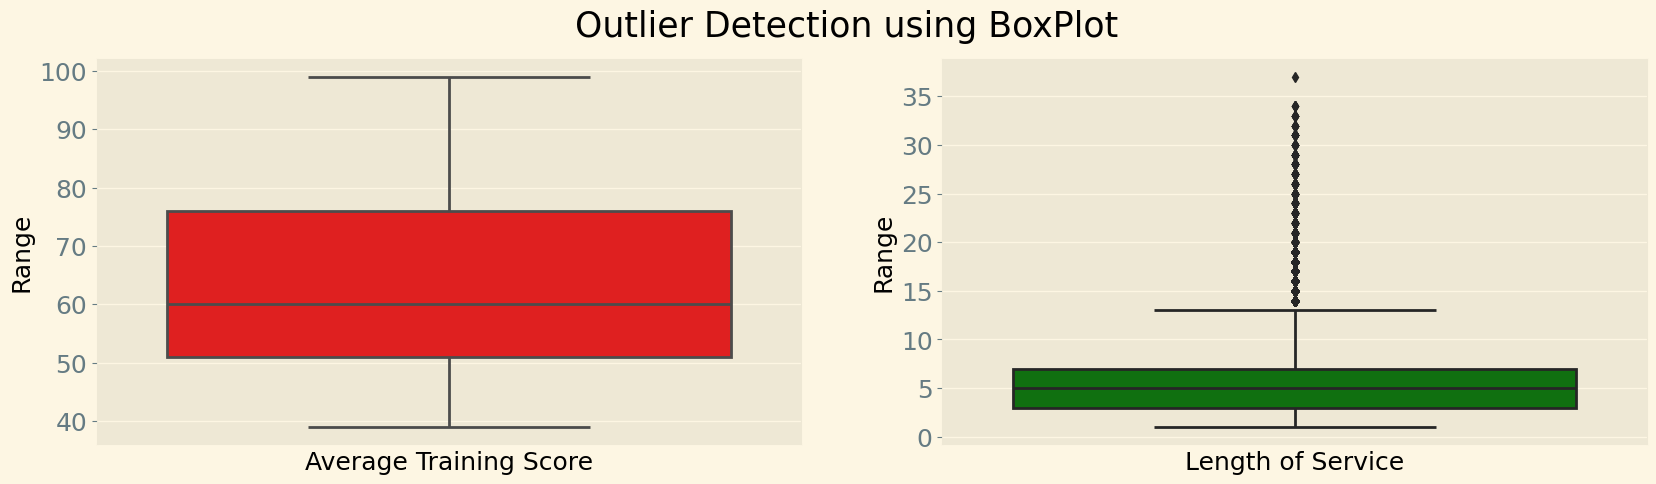

In [12]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.style.use('Solarize_Light2')

# Box plot for average training score
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'], color='red')
plt.xlabel('Average Training Score', fontsize=18)
plt.xticks([]), plt.yticks(fontsize=18)
plt.ylabel('Range', fontsize=18)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color='g')
plt.xlabel('Length of Service', fontsize=18)
plt.ylabel('Range', fontsize=18)
plt.xticks([]), plt.yticks(fontsize=18)
plt.suptitle('Outlier Detection using BoxPlot', fontsize=25)
plt.show()

From the boxplots, the average training score seems to not have any outliers. But the length of service, over 13 are all outliers as they are present outside the max value. But since the number of values are very less, they need not make much contributions.

To get more insights from the data, let's proceed with **Univariate Analysis**

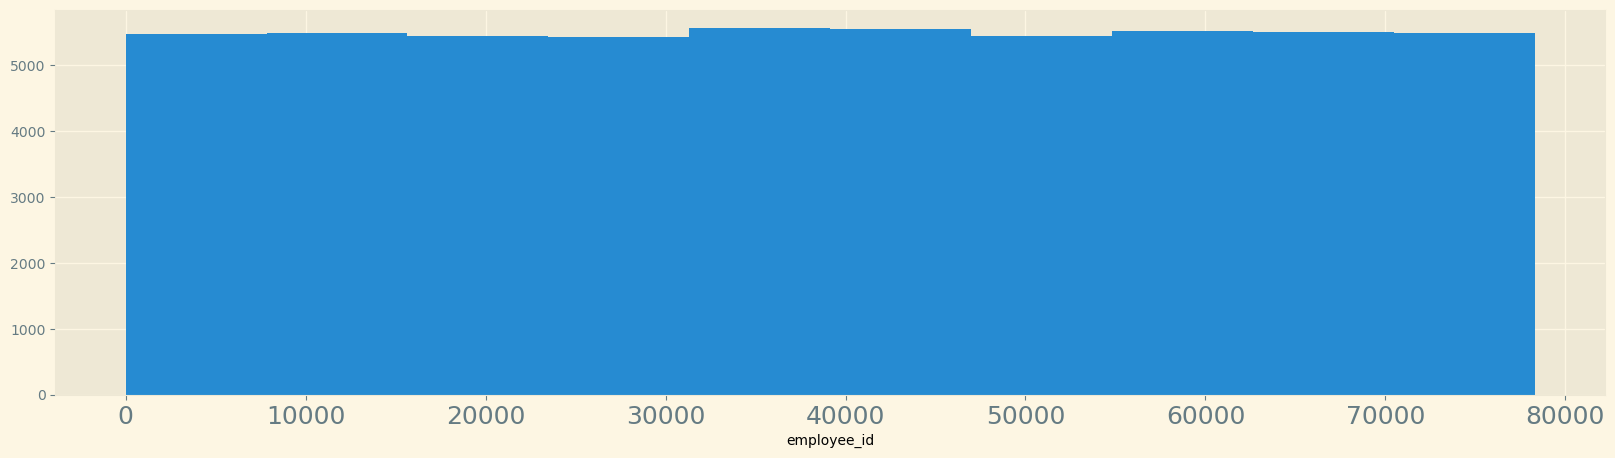

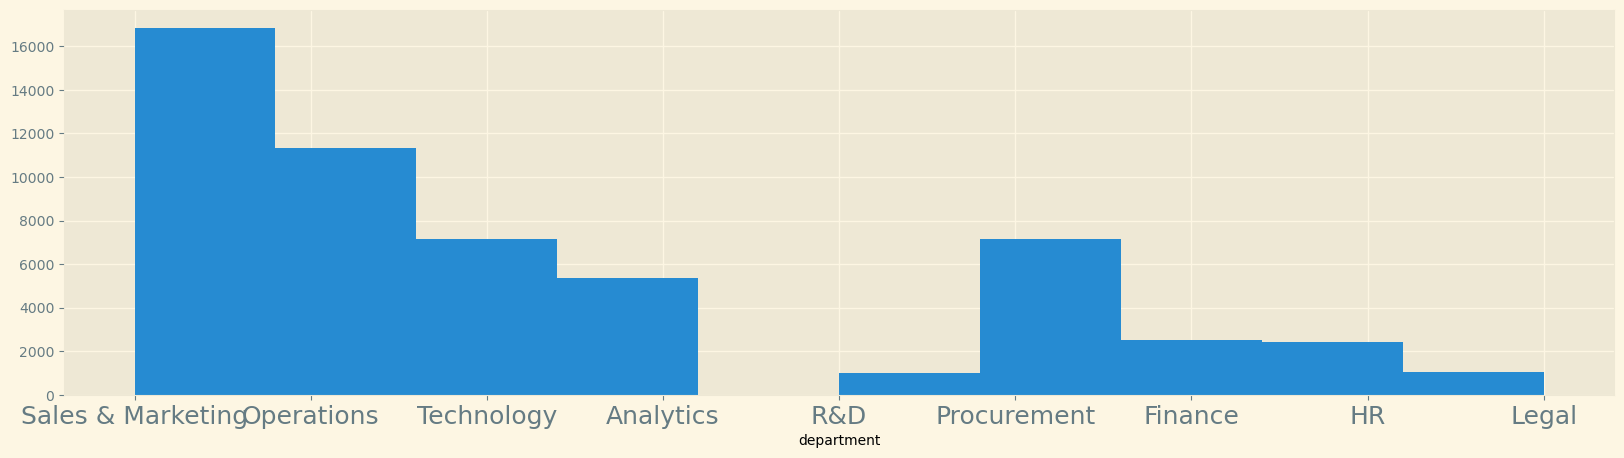

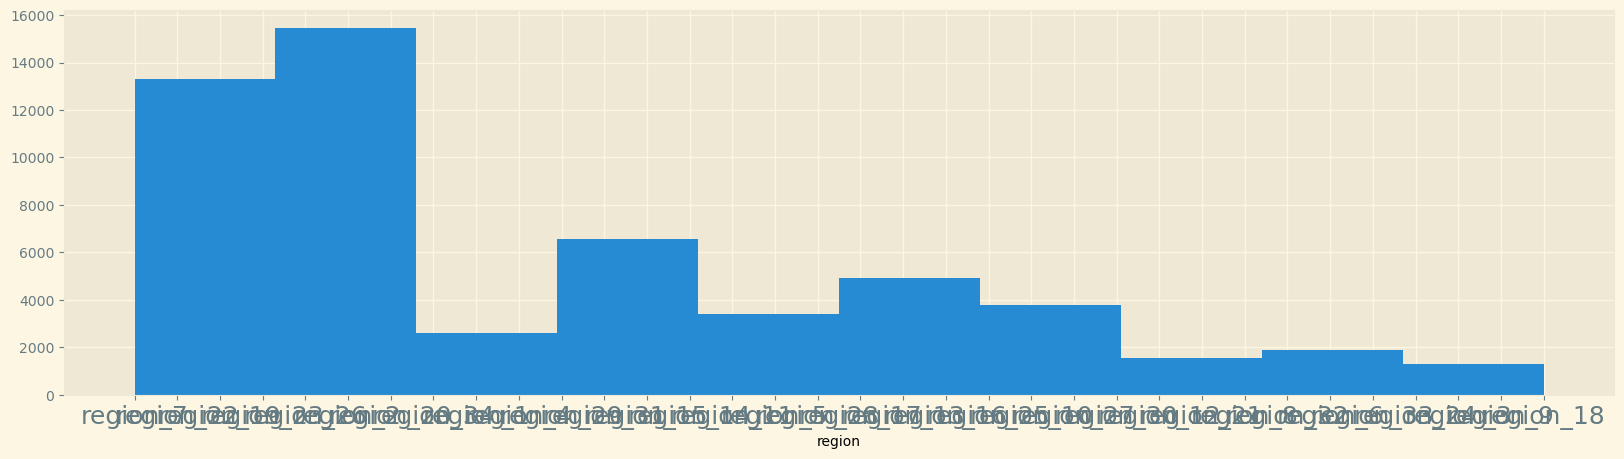

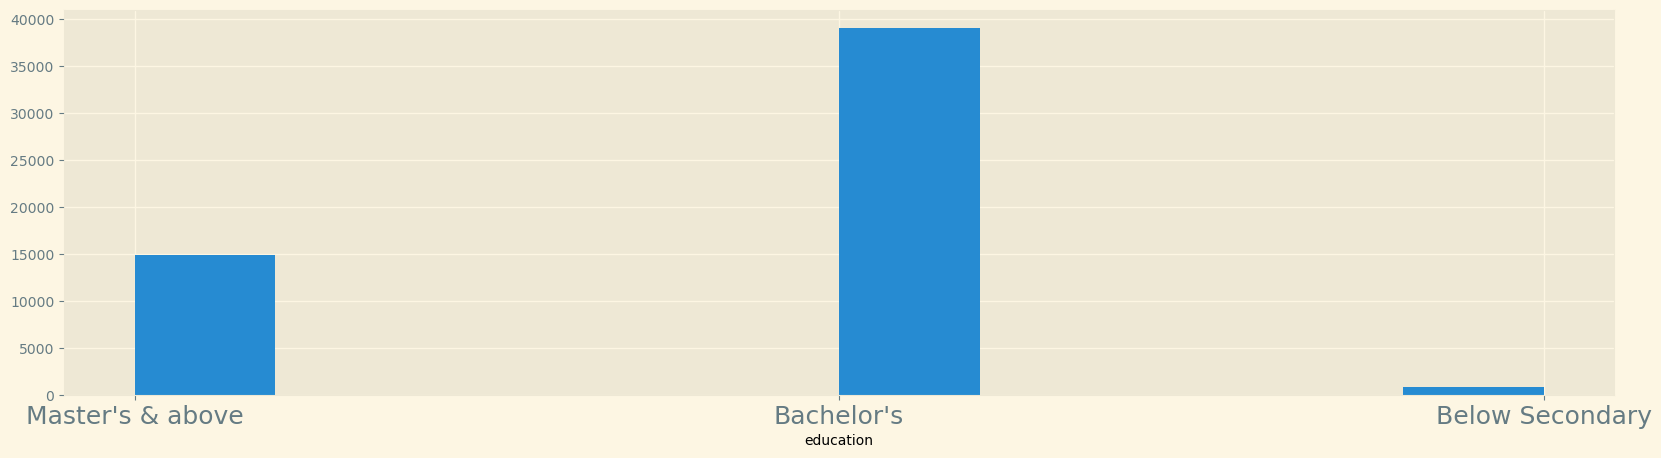

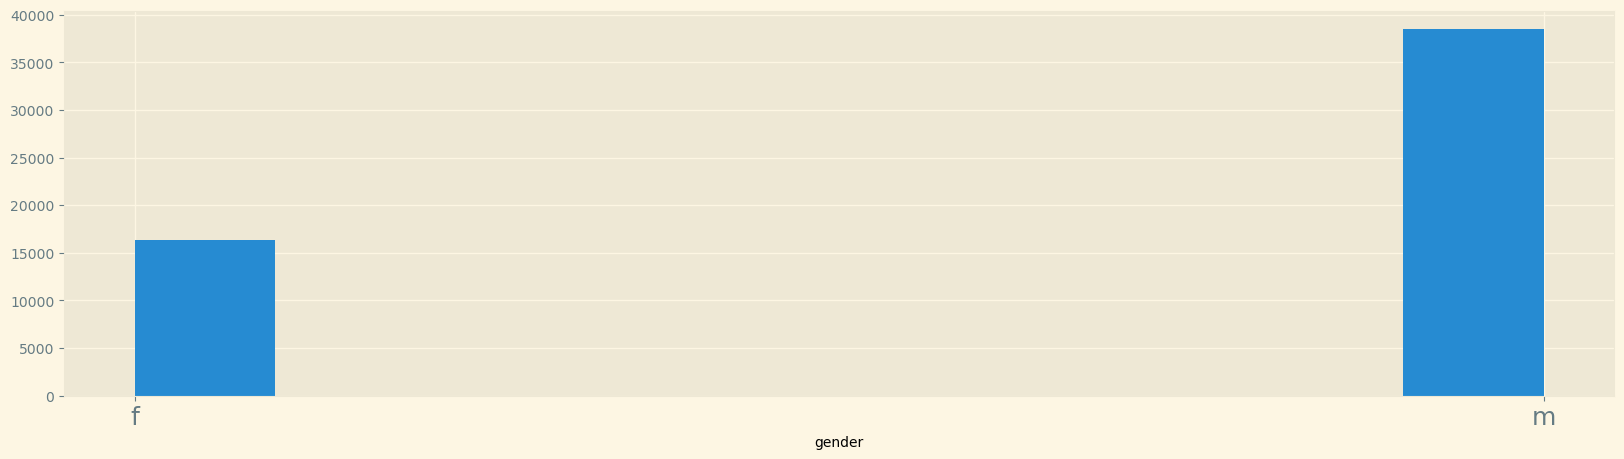

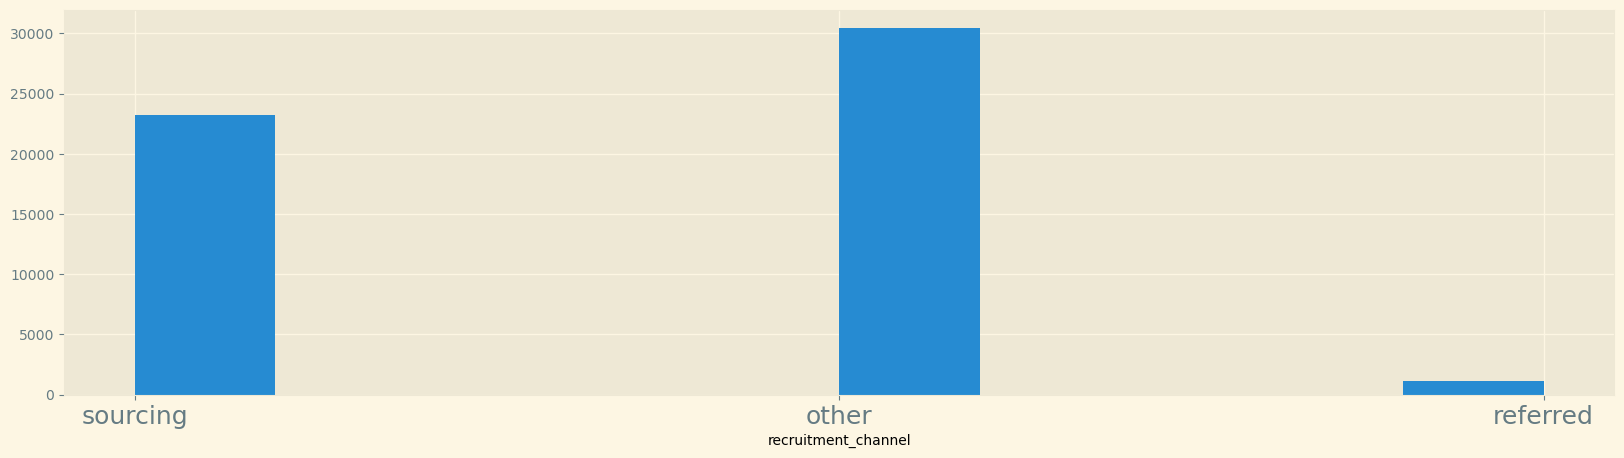

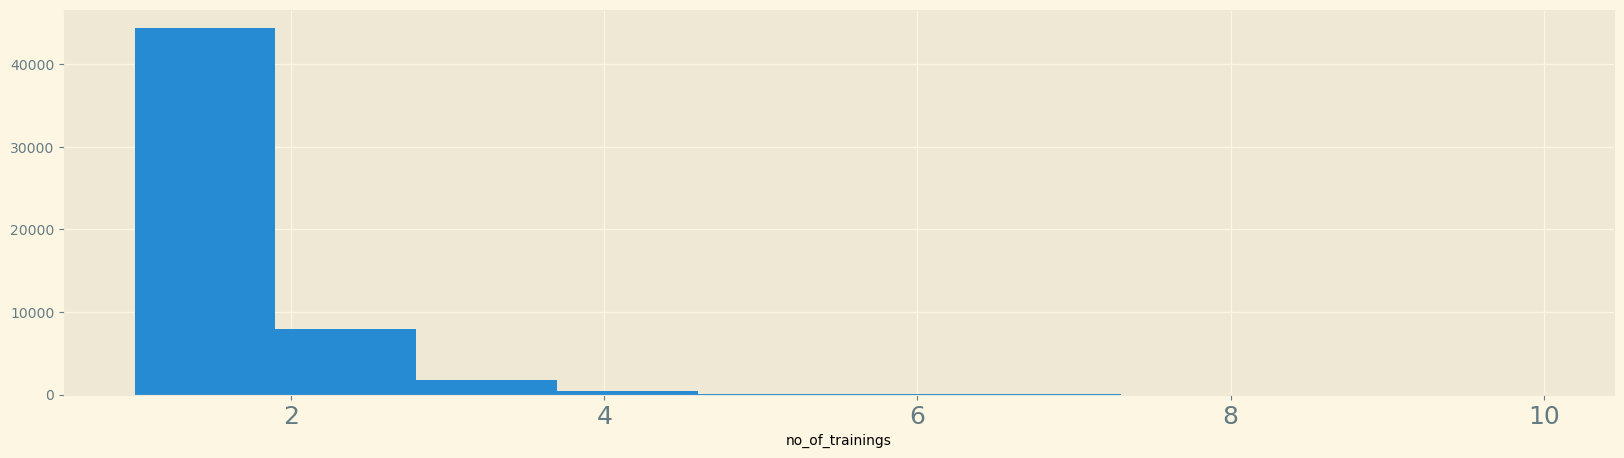

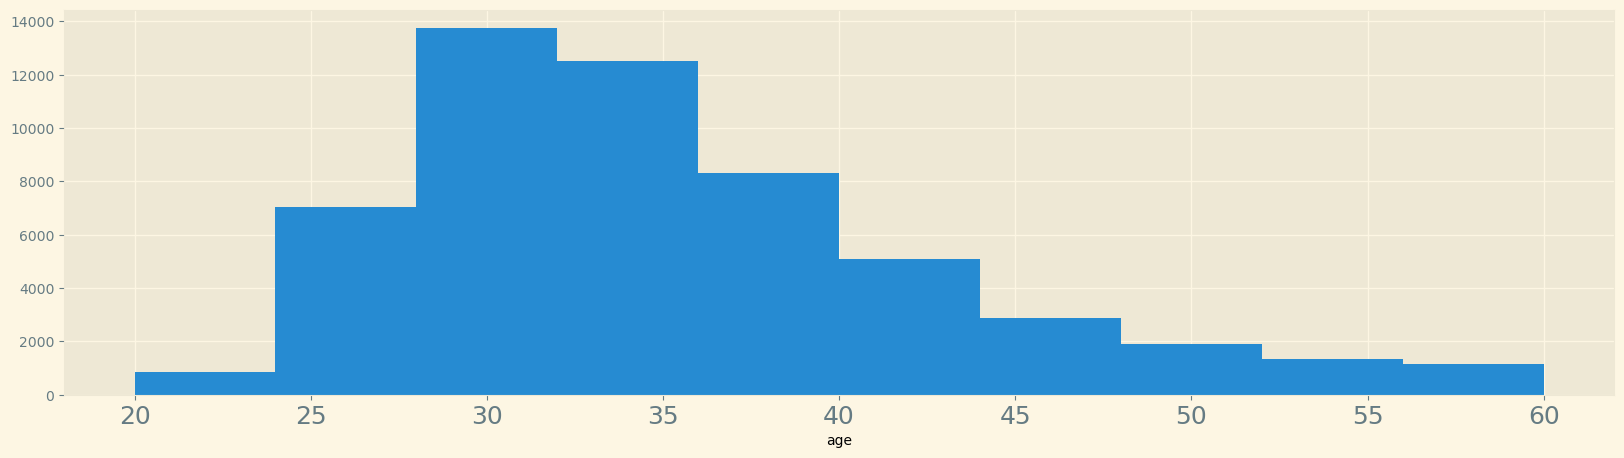

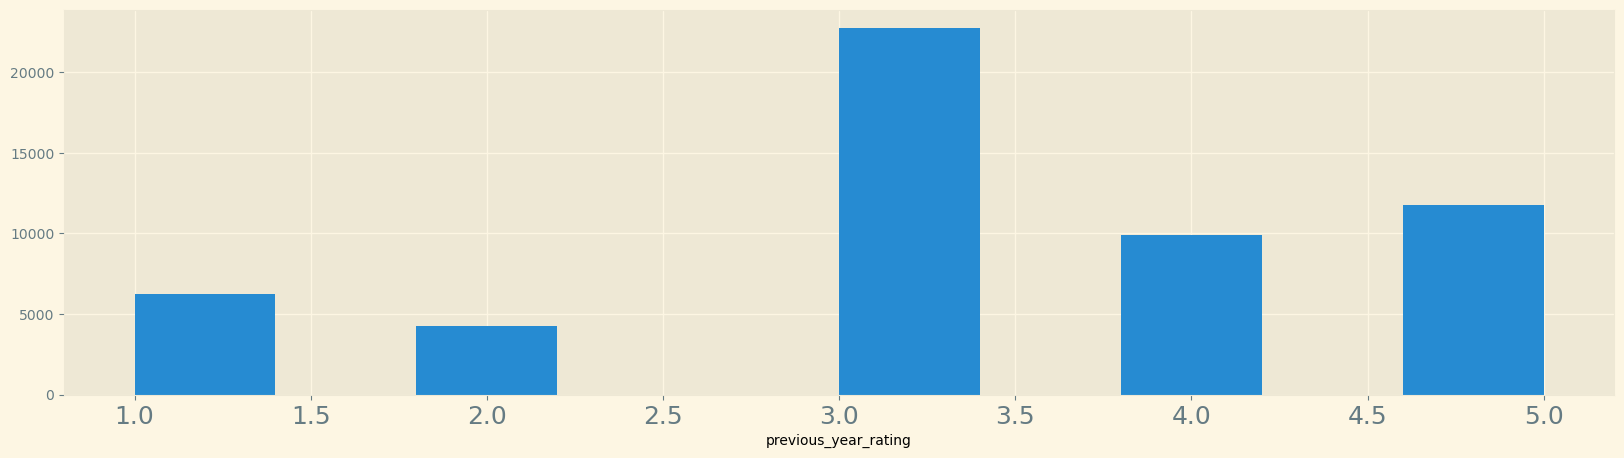

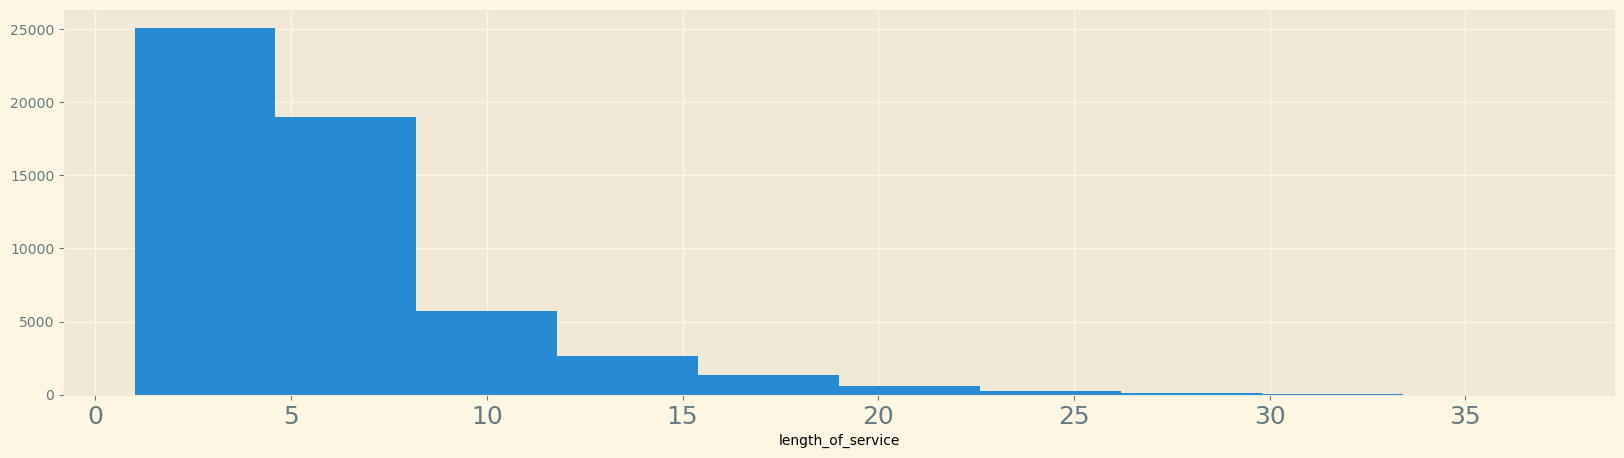

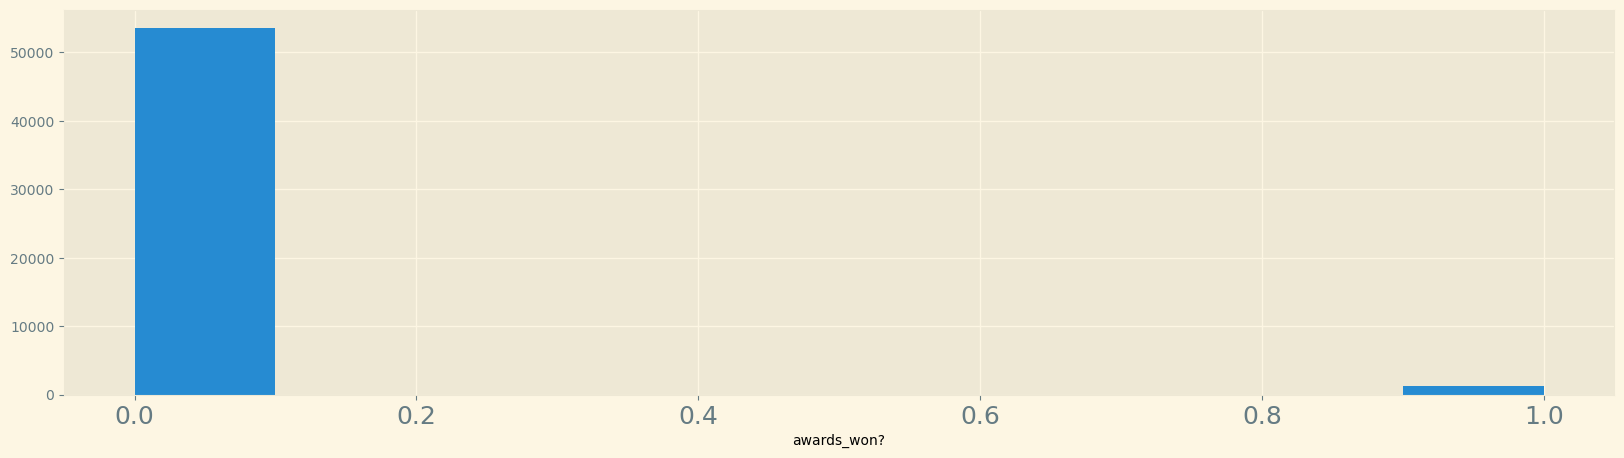

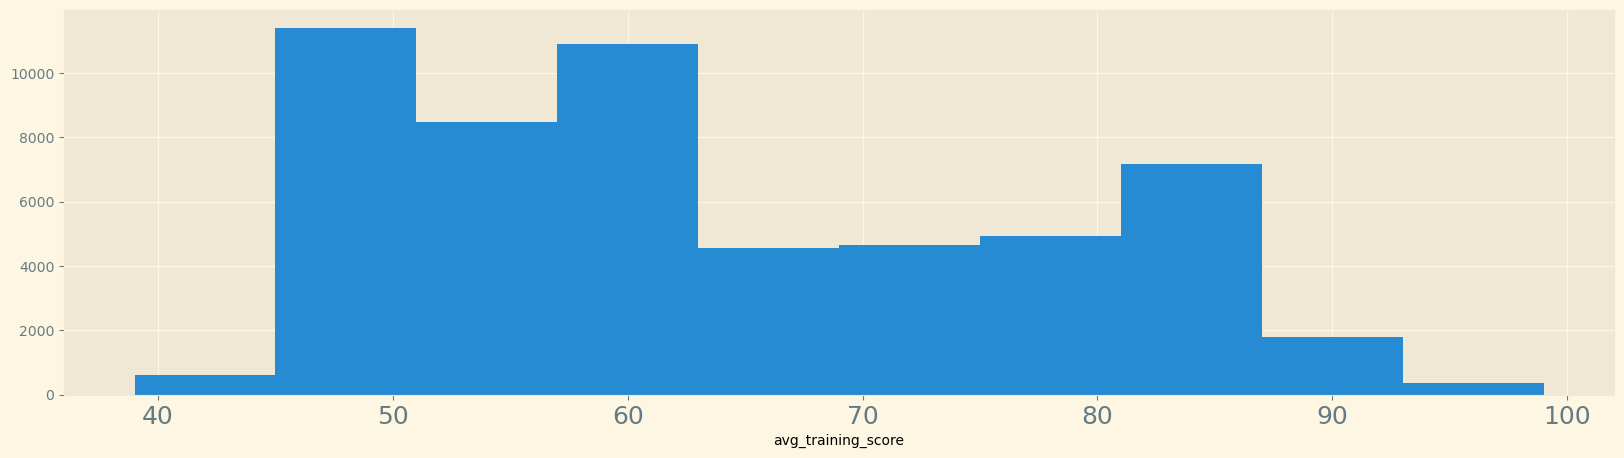

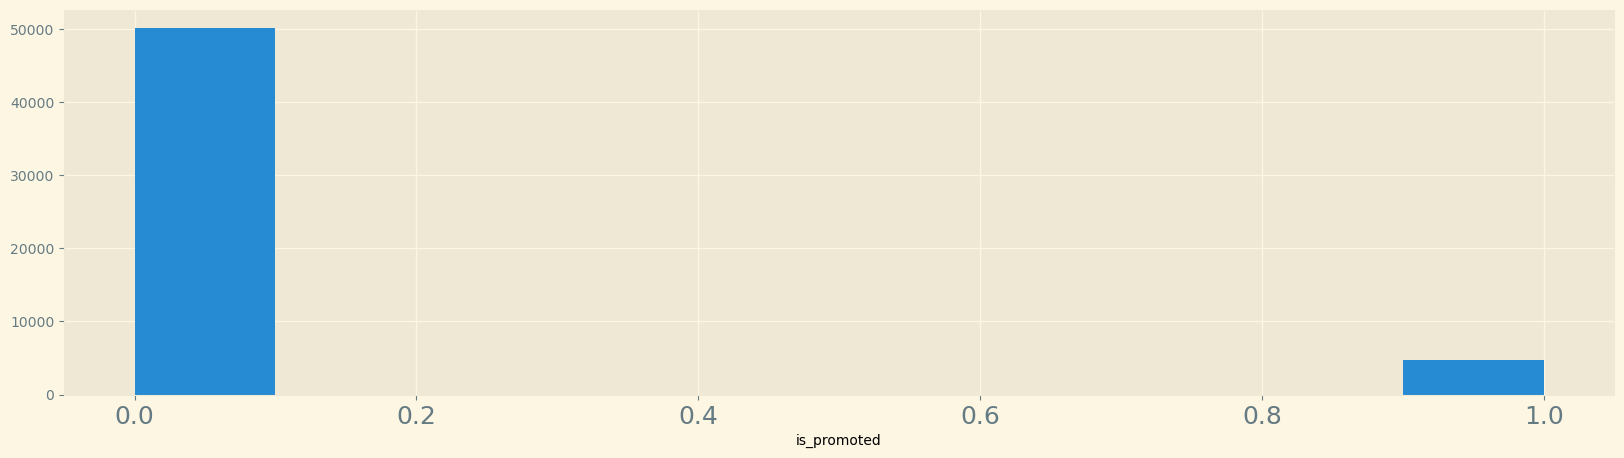

In [13]:
#Plotting histograms
plt.style.use('Solarize_Light2')
for c in train.columns:
    plt.hist(train[c])
    plt.xlabel(c), plt.xticks(fontsize=18)
    plt.show()

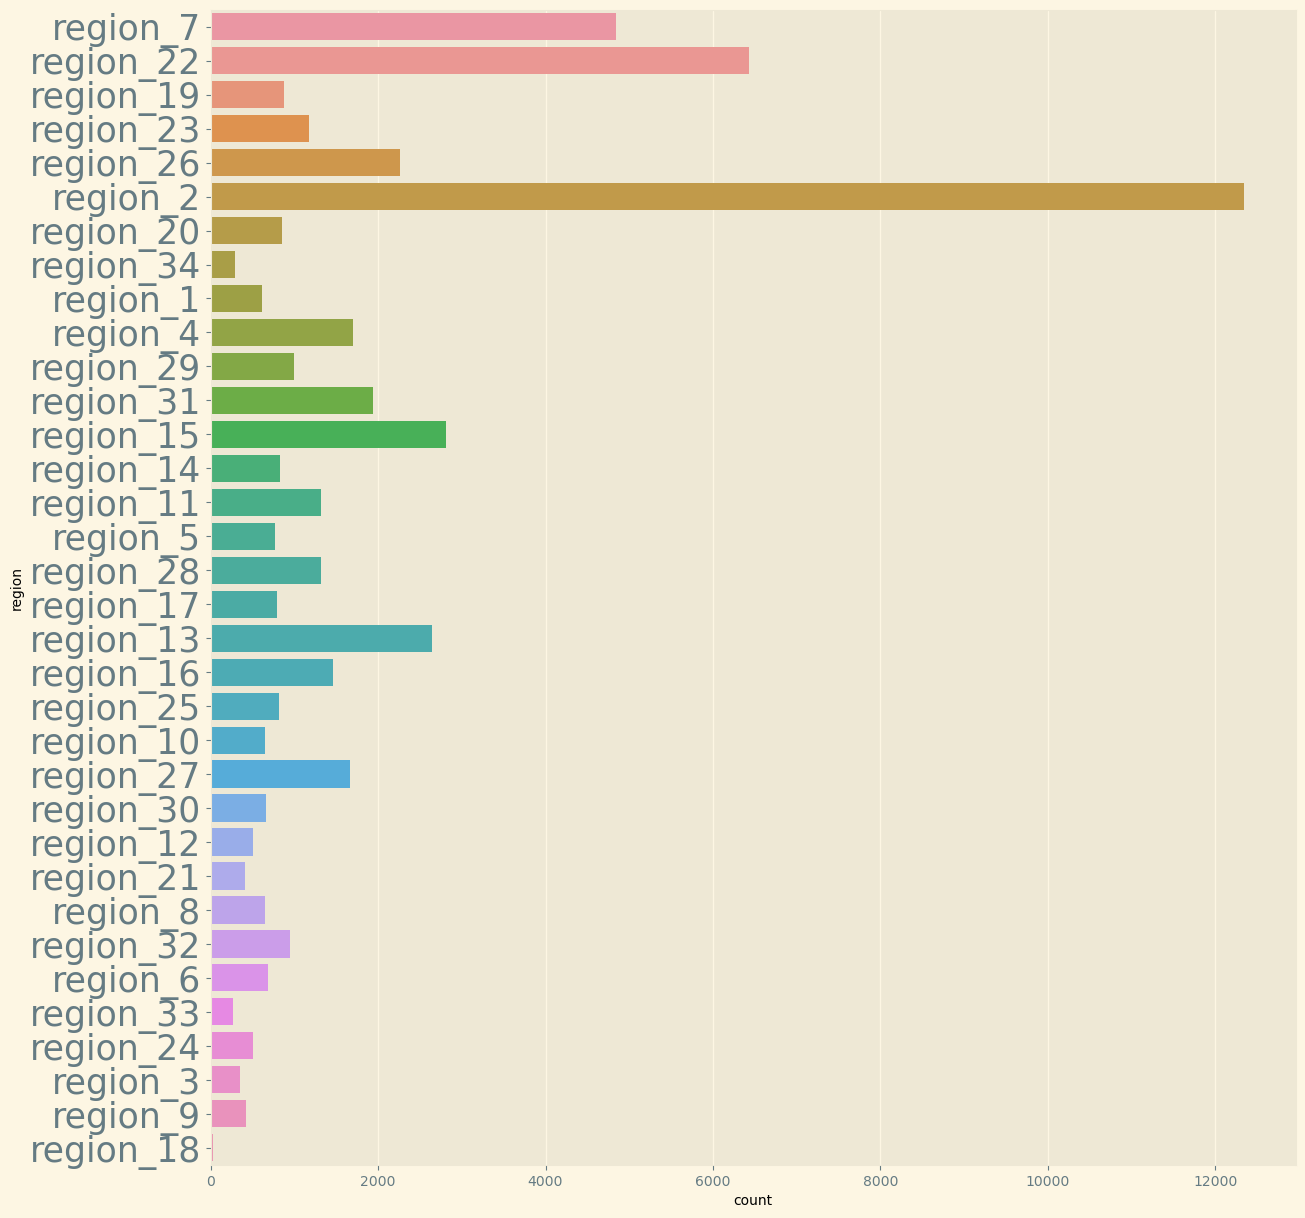

In [14]:
# Since the region bar plot is not proper, lets plot it in vertical fashion
plt.rcParams['figure.figsize'] = (14, 15)
sns.countplot(y = train['region'], orient='v')
plt.yticks(fontsize=25);


Possibility of an **award winner** to get a promotion is plotted below

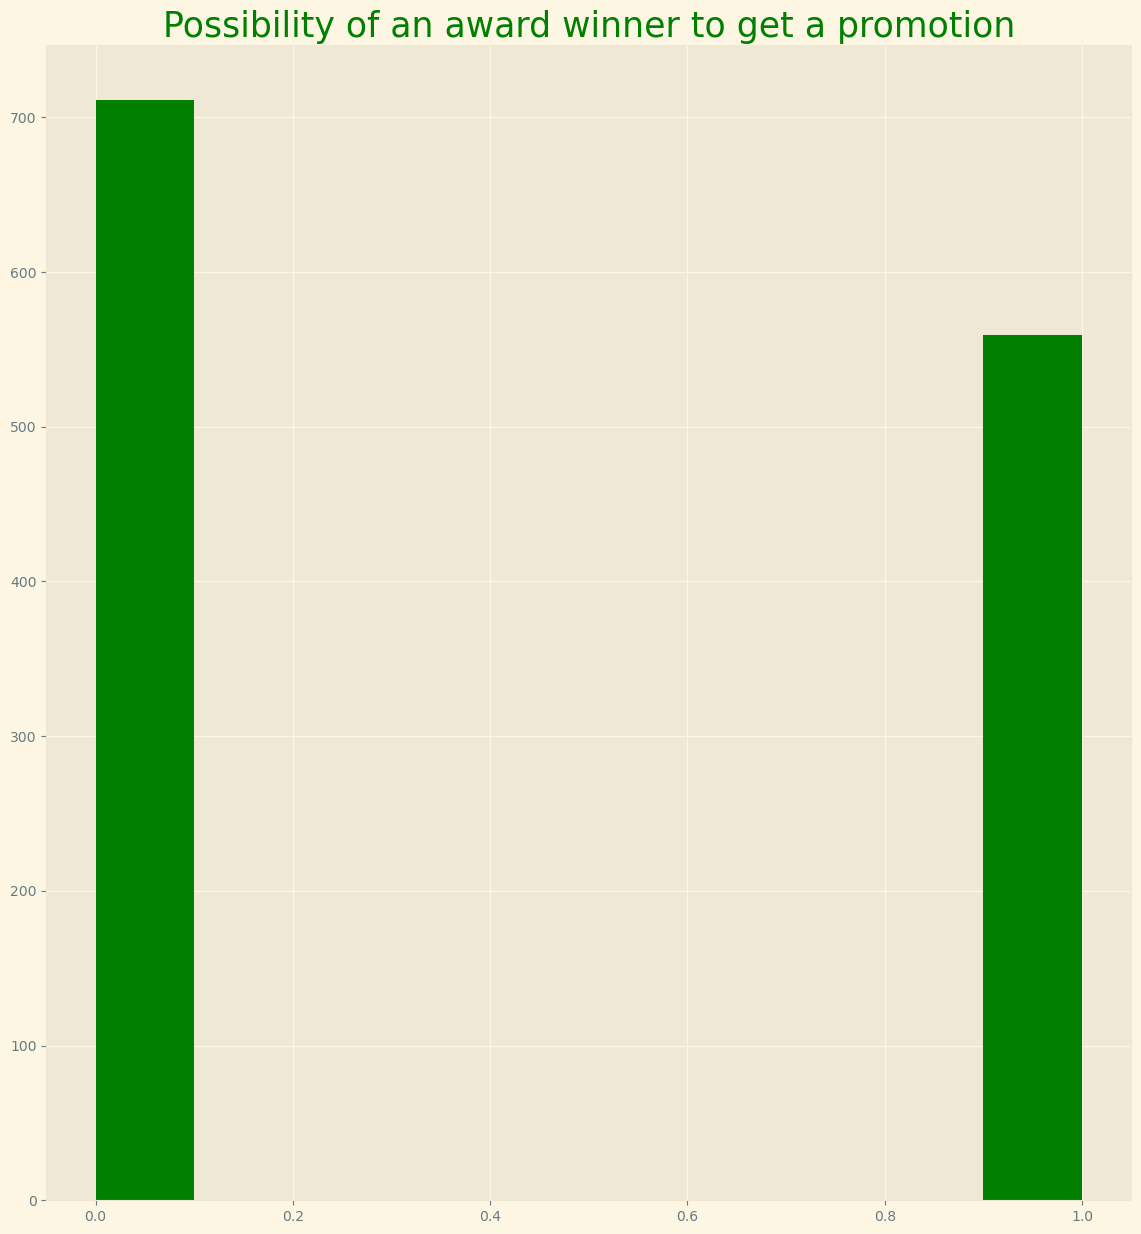

In [15]:
plt.hist(train['is_promoted'][train['awards_won?']==1], color='green')
plt.title('Possibility of an award winner to get a promotion', fontsize=25, color='g')
plt.show()

Possibility of an **non-award winner** to get a promotion is plotted below

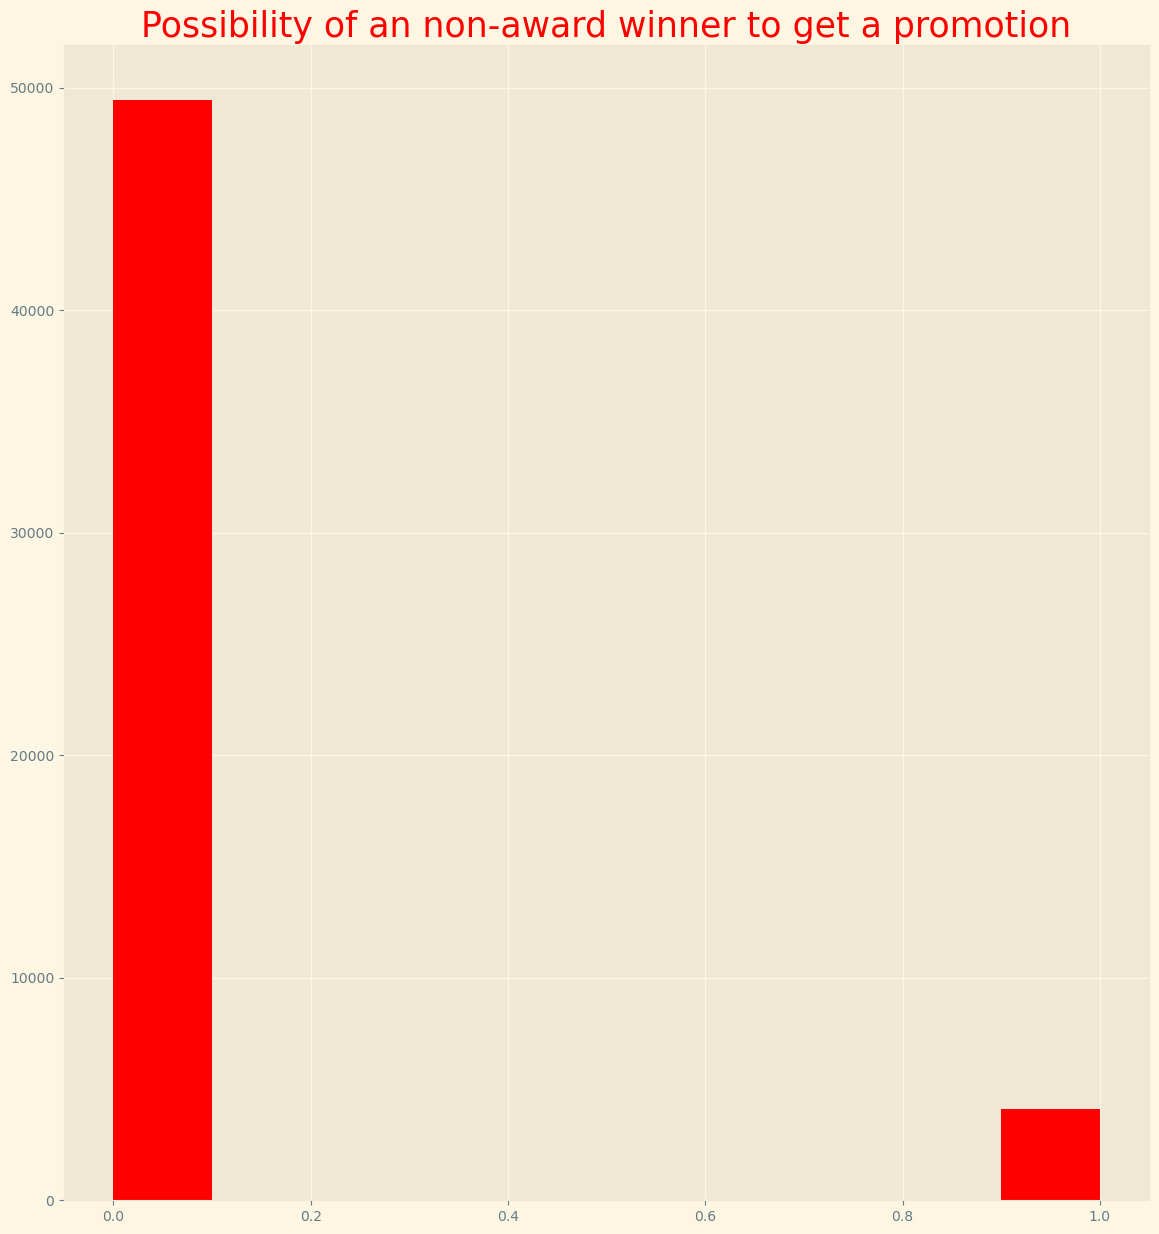

In [16]:
plt.hist(train['is_promoted'][train['awards_won?']==0], color='red')
plt.title('Possibility of an non-award winner to get a promotion', fontsize=25, color='r')
plt.show()

**Bivariate Analysis:** Determining empirical relation between different variables.

First, we will perform Categorical vs Categorical Analsyis using Stacked and Grouped Bar Charts using the help of crosstab function

Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc.

Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

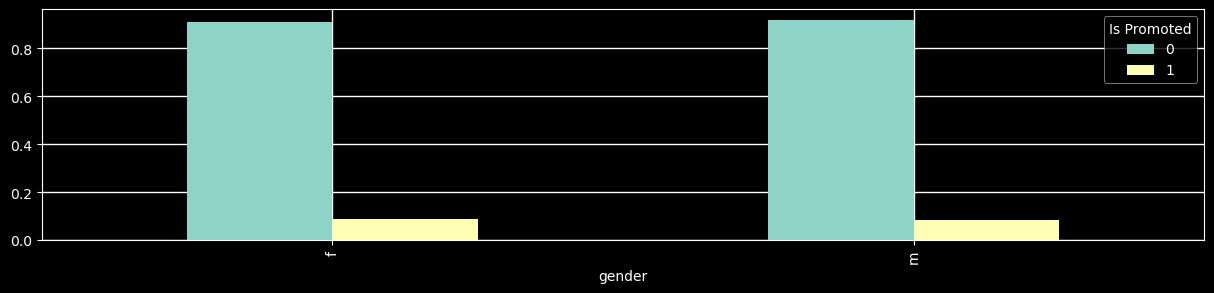

<Axes: xlabel='gender'>

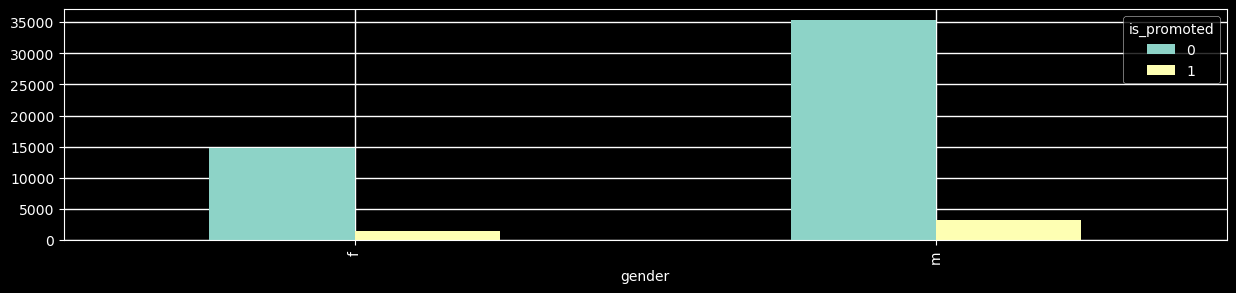

In [17]:
# Lets compare the Gender Gap in the promotion

plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('dark_background')
x = pd.crosstab(train['gender'], train['is_promoted'])
# print(x)
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar')
plt.legend(title='Is Promoted', labelcolor='w')
plt.show()
x.plot(kind='bar')

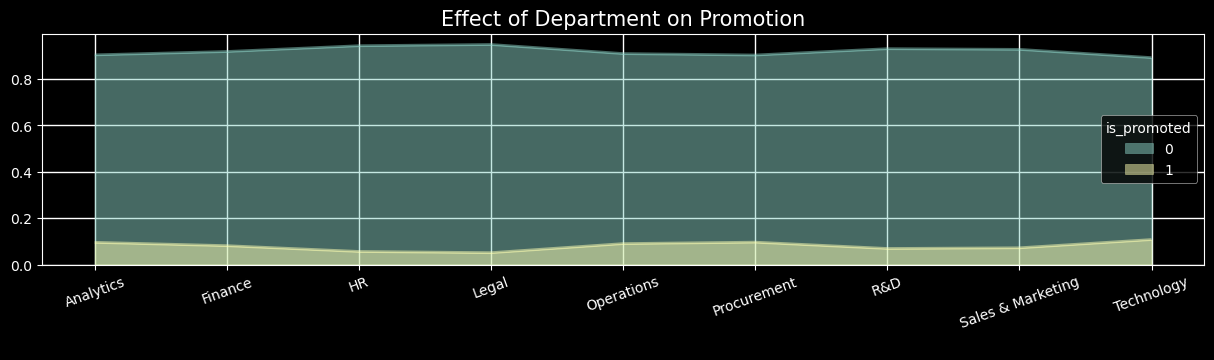

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [18]:
x= pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='area', stacked=False)
plt.title('Effect of Department on Promotion', fontsize=15)
plt.xticks(rotation=20)
plt.xlabel(' ')
plt.show()
x

Almost all the Departments have a very similar effect on Promotion. this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.

is_promoted,0,1
age,,
20,0.964602,0.035398
21,0.948980,0.051020
22,0.922078,0.077922
23,0.920561,0.079439
24,0.917160,0.082840
25,0.946882,0.053118
26,0.920874,0.079126
27,0.907676,0.092324
28,0.902129,0.097871


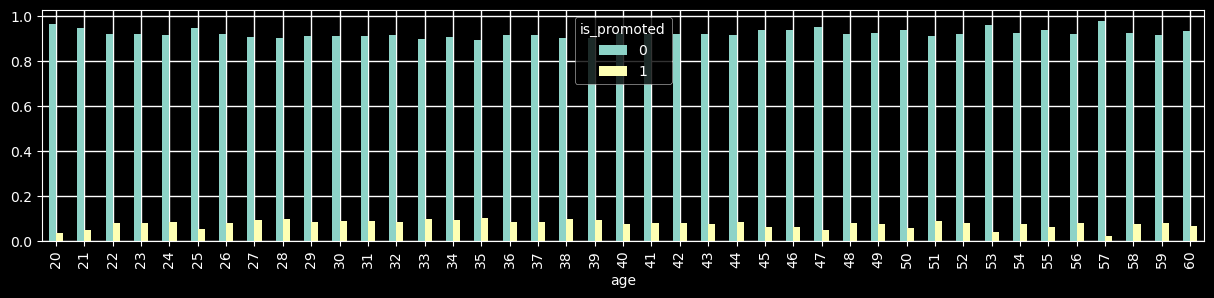

In [19]:
x = pd.crosstab(train['age'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar')
x.div(x.sum(1).astype(float), axis=0)

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


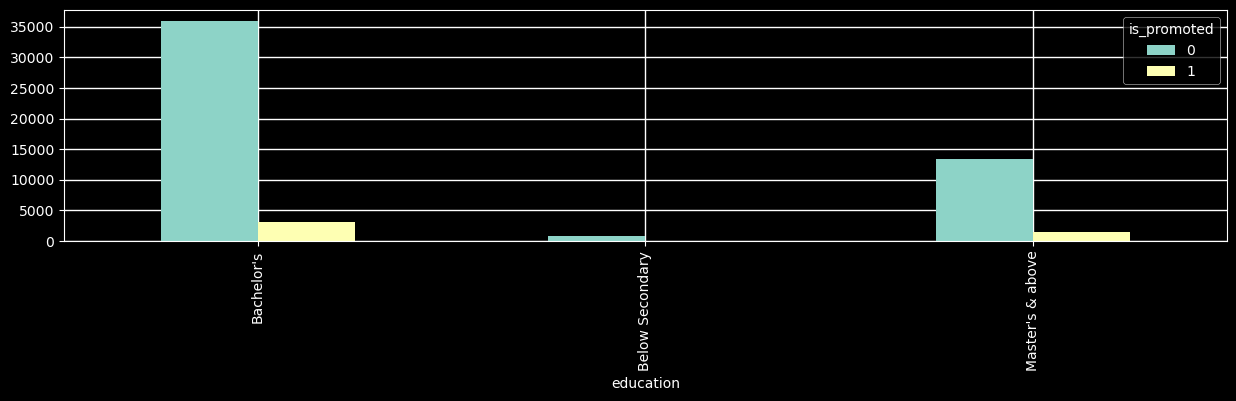

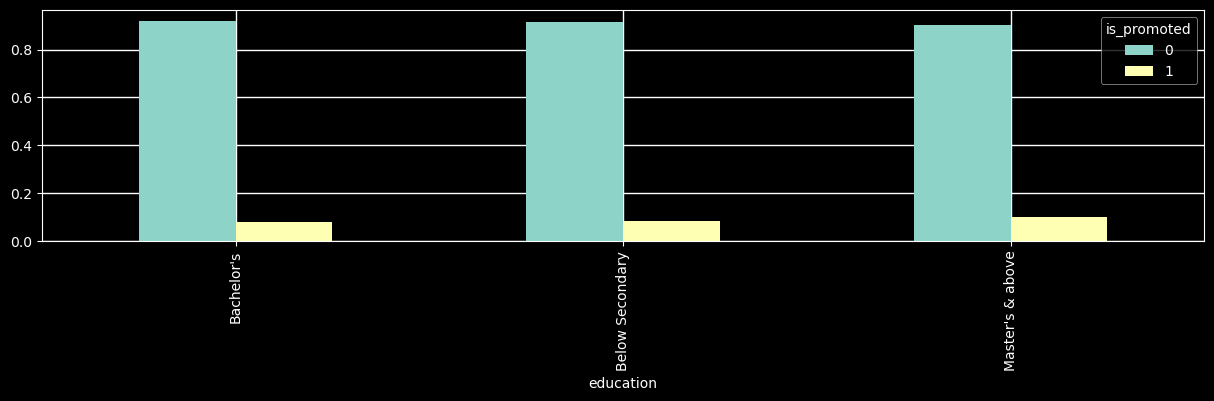

In [20]:
x = pd.crosstab(train['education'], train['is_promoted'])
x.plot(kind='bar')
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar')
x

Feature Engineering:

Process of using domain knowledge to extract features from raw data via data mining techniques.

1. We can perform Feature Engineering by Removing Unnecassary Columns
2. We can do it by Extracting Features from the Date and Time Features.
3. We can do it by Extracting Features from the Categorcial Features.
4. We can do it by Binnning the Numerical and Categorical Features.
5. We can do it by Aggregating Multiple Features together by using simple Arithmetic operations

In [21]:
# Creating new features from existing features to improve the performance
# Lets combine awards_won and previous_year_rating columns into a new column named 'sum_metric'
train['sum_metric'] = train['awards_won?'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['previous_year_rating']

# Creating a total score column
train['total_score'] = train['avg_training_score'] + train['no_of_trainings']
test['total_score'] = test['avg_training_score'] + test['no_of_trainings']

In [22]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it

train =train.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)
test =test.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)

train.columns
train.head(10)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,0,49,0,5.0,50
1,Operations,Bachelor's,m,1,30,5.0,4,0,60,0,5.0,61
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,50,0,3.0,51
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,50,0,1.0,52
4,Technology,Bachelor's,m,1,45,3.0,2,0,73,0,3.0,74
5,Analytics,Bachelor's,m,2,31,3.0,7,0,85,0,3.0,87
6,Operations,Bachelor's,f,1,31,3.0,5,0,59,0,3.0,60
7,Operations,Master's & above,m,1,33,3.0,6,0,63,0,3.0,64
8,Analytics,Bachelor's,m,1,28,4.0,5,0,83,0,4.0,84
9,Sales & Marketing,Master's & above,m,1,32,5.0,5,0,54,0,5.0,55


In [23]:
train = train.drop(train[(train['previous_year_rating']==1.0) & (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

Encoding categorical columns (Also called **one-hot encoding**):

1. This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
2. Here, we are going to use Business Logic to encode the education column
3. Then we will use the Label Encoder, to Department and Gender Columns

In [24]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [25]:
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))

In [26]:
# lets use Label Encoding (Scikit library) for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)
train.head()

Index([], dtype='object')
Index([], dtype='object')


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,0,49,0,5.0,50
1,4,2,1,1,30,5.0,4,0,60,0,5.0,61
2,7,2,1,1,34,3.0,7,0,50,0,3.0,51
3,7,2,1,2,39,1.0,10,0,50,0,1.0,52
4,8,2,1,1,45,3.0,2,0,73,0,3.0,74


In [27]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,0,77,3.0,78
1,2,2,0,1,31,3.0,5,0,51,3.0,52
2,7,2,1,1,31,1.0,4,0,47,1.0,48
3,5,2,0,3,31,2.0,9,0,65,2.0,68
4,1,2,1,1,30,4.0,7,0,61,4.0,62


Let's Split the data into **input 'x'** and **labeled output 'y'**.

In [28]:
#Splitting the dataset into input and output variables

x = train.drop(['is_promoted'], axis=1)
y = train['is_promoted']
x_test = test

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")
print(f"The shape of x_test is : {x_test.shape}")

The shape of x is : (54790, 11)
The shape of y is : (54790,)
The shape of x_test is : (23490, 11)


From all the data cleaning and preprocessing, it is evident that the dataset has unbalance labeled outputs i.e., minority to majority ratio is very small. It is known that the ML models like decision trees and logistic regression are majority biased. To balance the dataset, **Data resampling** is commonly used. 
Types of data resampling (for bootstrapping):
1) **Random over-sampling** - Replicating the minority examples into k folds and increasing the number of examples overall.
2) **Random Under-sampling** - Randomly removing the majority examples and decreasing the number of examples overall
3) **Cluster based Sampling** - Randomly clustering the dataset and make all the cluster of same length, hence perfectly balanced, like how things should be. 

Here, let's use **random under-sampling**, because it is good to have more examples rather than removing examples.

In [29]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(100280, 11)
(100280,)


In [30]:
print("Before Resampling: ")
print(y.value_counts())

print("After Resampling: ")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling: 
0    50140
1     4650
Name: is_promoted, dtype: int64
After Resampling: 
0    50140
1    50140
Name: 0, dtype: int64


Let's split the dataset to obtain the training set and cross-validation set.

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size=0.2, random_state=0)

print(f"The shape of the x_train: {x_train.shape}")
print(f"The shape of the y_train: {y_train.shape}")
print(f"The shape of the x_valid: {x_valid.shape}")
print(f"The shape of the y-valid: {y_valid.shape}")
print(f"The shape of the x_test: {x_test.shape}")
x_test

The shape of the x_train: (80224, 11)
The shape of the y_train: (80224, 1)
The shape of the x_valid: (20056, 11)
The shape of the y-valid: (20056, 1)
The shape of the x_test: (23490, 11)


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,0,77,3.0,78
1,2,2,0,1,31,3.0,5,0,51,3.0,52
2,7,2,1,1,31,1.0,4,0,47,1.0,48
3,5,2,0,3,31,2.0,9,0,65,2.0,68
4,1,2,1,1,30,4.0,7,0,61,4.0,62
...,...,...,...,...,...,...,...,...,...,...,...
23485,3,1,1,1,24,3.0,1,0,61,3.0,62
23486,8,2,1,1,31,3.0,7,0,74,3.0,75
23487,2,2,0,1,26,4.0,4,0,50,4.0,51
23488,5,2,1,3,27,3.0,1,0,70,3.0,73


**Feature Scaling:**

1. Normalize the range of independent variables or features of data
2. it is also known as data normalization and is generally performed during the data preprocessing step

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)
x_test

array([[ 1.22089342, -0.46872606,  0.78600939, ...,  0.70028494,
        -0.55824555,  0.68427183],
       [-1.16834782, -0.46872606, -1.27224943, ..., -1.09457029,
        -0.55824555, -1.1071748 ],
       [ 0.82268654, -0.46872606,  0.78600939, ..., -1.37070187,
        -2.2507526 , -1.38278198],
       ...,
       [-1.16834782, -0.46872606, -1.27224943, ..., -1.16360319,
         0.28800797, -1.1760766 ],
       [ 0.0262728 , -0.46872606,  0.78600939, ...,  0.21705469,
        -0.55824555,  0.33976287],
       [ 1.22089342,  1.77048548,  0.78600939, ...,  1.52867967,
         1.13426149,  1.64889695]])

**Decision Tree Classifier:**

tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

Training Accuracy: 0.9781486836856801
Validation set Accuracy: 0.9101515755883526


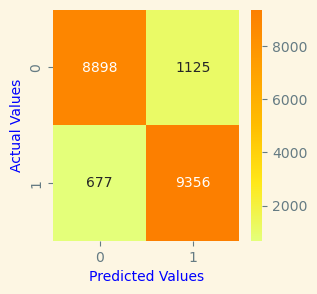

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"Training Accuracy: {model.score(x_train, y_train)}")
print(f"Validation set Accuracy: {model.score(x_valid, y_valid)}")

plt.style.use('Solarize_Light2')
cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap= 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values', color='b')
plt.ylabel("Actual Values", color='b')
plt.show()

In [35]:
cr = classification_report(y_valid, y_pred)
# cr = pd.DataFrame(cr)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10023
           1       0.89      0.93      0.91     10033

    accuracy                           0.91     20056
   macro avg       0.91      0.91      0.91     20056
weighted avg       0.91      0.91      0.91     20056



In [36]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.00000,54790.000000,54790.000000
mean,4.972367,2.257638,0.702300,1.253057,34.803888,3.305238,5.864866,0.023179,63.390290,0.08487,3.328418,64.643347
std,2.506223,0.469734,0.457251,0.609332,7.660646,1.214251,4.264926,0.150474,13.372075,0.27869,1.227491,13.411792
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.00000,1.000000,40.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.00000,3.000000,52.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.00000,3.000000,61.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.00000,4.000000,77.000000
max,8.000000,3.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.00000,6.000000,103.000000


In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

C:\Users\RSLS\AppData\Local\Temp\ipykernel_16924\3005525608.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)


The training accuracy: 0.9781486836856801
The validation accuracy: 0.9101515755883526


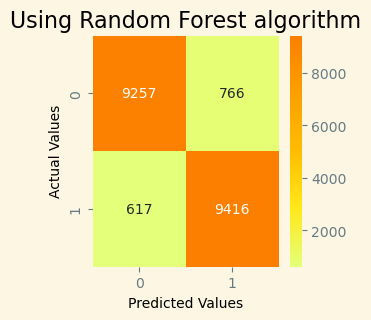

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10023
           1       0.92      0.94      0.93     10033

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [38]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_valid)

print(f"The training accuracy: {model.score(x_train, y_train)}")
print(f"The validation accuracy: {model.score(x_valid, y_valid)}")
cm = confusion_matrix(y_valid, y_pred1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Actual Values', color='black')
plt.title("Using Random Forest algorithm", color='black')
plt.show()

cr1 = classification_report(y_valid, y_pred1)
print(cr1)

C:\Users\RSLS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training accuracy: 0.9781486836856801
The validation accuracy: 0.9101515755883526


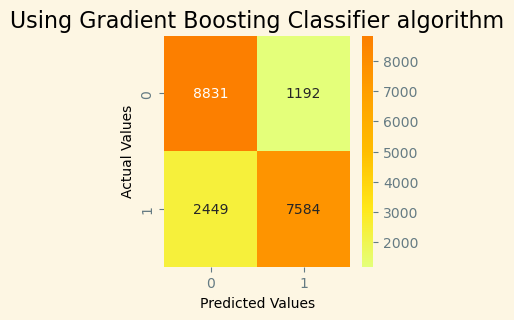

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     10023
           1       0.86      0.76      0.81     10033

    accuracy                           0.82     20056
   macro avg       0.82      0.82      0.82     20056
weighted avg       0.82      0.82      0.82     20056



In [39]:
model2 = GradientBoostingClassifier()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_valid)

print(f"The training accuracy: {model.score(x_train, y_train)}")
print(f"The validation accuracy: {model.score(x_valid, y_valid)}")
cm = confusion_matrix(y_valid, y_pred2)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Actual Values', color='black')
plt.title("Using Gradient Boosting Classifier algorithm", color='black')
plt.show()

cr2 = classification_report(y_valid, y_pred2)
print(cr2)

C:\Users\RSLS\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training accuracy: 0.9781486836856801
The validation accuracy: 0.9101515755883526


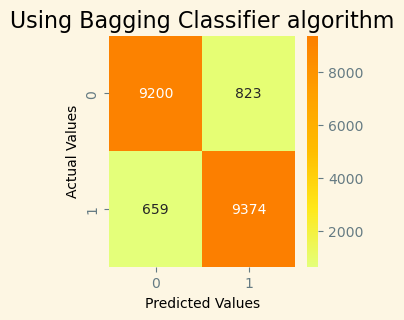

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10023
           1       0.92      0.93      0.93     10033

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [40]:
model3 = BaggingClassifier()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_valid)

print(f"The training accuracy: {model.score(x_train, y_train)}")
print(f"The validation accuracy: {model.score(x_valid, y_valid)}")
cm = confusion_matrix(y_valid, y_pred3)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Actual Values', color='black')
plt.title("Using Bagging Classifier algorithm", color='black')
plt.show()

cr3 = classification_report(y_valid, y_pred3)
print(cr3)

The training accuracy: 0.9781486836856801
The validation accuracy: 0.9101515755883526


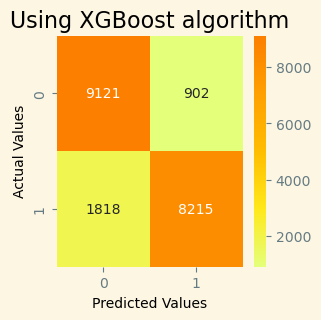

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     10023
           1       0.90      0.82      0.86     10033

    accuracy                           0.86     20056
   macro avg       0.87      0.86      0.86     20056
weighted avg       0.87      0.86      0.86     20056



In [41]:
from xgboost import XGBClassifier

model4 = XGBClassifier()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_valid)

y_pred4 = model4.predict(x_valid)

print(f"The training accuracy: {model.score(x_train, y_train)}")
print(f"The validation accuracy: {model.score(x_valid, y_valid)}")
cm = confusion_matrix(y_valid, y_pred4)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Actual Values', color='black')
plt.title("Using XGBoost algorithm", color='black')
plt.show()

cr4 = classification_report(y_valid, y_pred4)
print(cr4)

The random forest algorithm has the best accuracy and f1 score compared to other algorithms

In [42]:
y1_test = model1.predict(x_test)
y2_test = model2.predict(x_test)
y3_test = model3.predict(x_test)
y4_test = model4.predict(x_test)
y_test = model.predict(x_test)

y_test_predict = pd.DataFrame([y_test, y1_test, y2_test, y3_test, y4_test])

In [43]:
y_test_predict

,0,1,2,3,4,5,6,7,8,9,...,23480,23481,23482,23483,23484,23485,23486,23487,23488,23489
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


### Neural Network Implementation

In [104]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

In [105]:
tf.random.set_seed(1234) # for consistent results
NN_model = Sequential(
                [tf.keras.Input(shape=(11,)),
                Dense(units = 1000, activation='relu'),
                Dense(units = 500, activation='relu'),
                Dense(units = 250, activation='relu'),
                Dense(units = 1, activation='sigmoid')], name = 'Prediction_Model'
                )
NN_model.summary()

Model: "Prediction_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1000)              12000     
                                                                 
 dense_33 (Dense)            (None, 500)               500500    
                                                                 
 dense_34 (Dense)            (None, 250)               125250    
                                                                 
 dense_35 (Dense)            (None, 1)                 251       
                                                                 
Total params: 638001 (2.43 MB)
Trainable params: 638001 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
NN_model.compile(
            loss=BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

history = NN_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
2507/2507 [==============================] - 23s 9ms/step - loss: 0.5176
Epoch 2/50
2507/2507 [==============================] - 25s 10ms/step - loss: 0.4640
Epoch 3/50
2507/2507 [==============================] - 22s 9ms/step - loss: 0.4418
Epoch 4/50
2507/2507 [==============================] - 22s 9ms/step - loss: 0.4255
Epoch 5/50
2507/2507 [==============================] - 23s 9ms/step - loss: 0.4075
Epoch 6/50
2507/2507 [==============================] - 23s 9ms/step - loss: 0.3924
Epoch 7/50
2507/2507 [==============================] - 24s 9ms/step - loss: 0.3824
Epoch 8/50
2507/2507 [==============================] - 23s 9ms/step - loss: 0.3739
Epoch 9/50
2507/2507 [==============================] - 22s 9ms/step - loss: 0.3688
Epoch 10/50
2507/2507 [==============================] - 22s 9ms/step - loss: 0.3626
Epoch 11/50
2507/2507 [==============================] - 23s 9ms/step - loss: 0.3580
Epoch 12/50
2507/2507 [==============================] - 23s 9ms/step - l

In [107]:
y_train_predict = NN_model.predict(x_train)
y_valid_predict = NN_model.predict(x_valid)
y_train_predict

627/627 [==============================] - 1s 2ms/step


array([[4.9709275e-01],
       [9.9966931e-01],
       [7.4297994e-01],
       ...,
       [7.5695065e-15],
       [5.3982210e-01],
       [1.0000000e+00]], dtype=float32)

In [108]:
y_train_predict = np.where(y_train_predict > 0.5, 1, 0)
y_valid_predict = np.where(y_valid_predict > 0.5, 1, 0)

In [109]:
y_valid_predict

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

##### Accuracy function

In [110]:
def accuracy(y_hat, y):
    
    y = np.where(y_hat == y, 1, 0)
    accuracy = np.sum(y) / len(y_hat)
    return accuracy

In [111]:
print(f"Training accuracy is {accuracy(y_train_predict, y_train)}")
print(f"validation accuracy is {accuracy(y_valid_predict, y_valid)}")

Training accuracy is 0.8904941164738731
validation accuracy is 0.863831272437176


It is seen that the training and validation set have same accuracy.

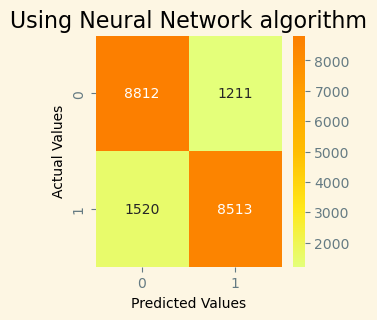

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     10023
           1       0.88      0.85      0.86     10033

    accuracy                           0.86     20056
   macro avg       0.86      0.86      0.86     20056
weighted avg       0.86      0.86      0.86     20056



In [112]:
cm = confusion_matrix(y_valid, y_valid_predict)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Actual Values', color='black')
plt.title("Using Neural Network algorithm", color='black')
plt.show()

cr_nn = classification_report(y_valid, y_valid_predict)
print(cr_nn)